In [1]:
train_path="D:\\train_tomato"

In [2]:
import os
train_labels = os.listdir(train_path)
print(train_labels)

['early_blight', 'healthy', 'late_blight']


In [3]:
train_labels.sort()
print(train_labels)

['early_blight', 'healthy', 'late_blight']


In [4]:
import numpy as np
import mahotas
import cv2
import os
import h5py

C:\Users\moham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import sys
sys.executable
sys.path
# import tensorflow as tf

['',
 'C:\\Users\\moham\\Anaconda3\\python36.zip',
 'C:\\Users\\moham\\Anaconda3\\DLLs',
 'C:\\Users\\moham\\Anaconda3\\lib',
 'C:\\Users\\moham\\Anaconda3',
 'C:\\Users\\moham\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'C:\\Users\\moham\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\moham\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\moham\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\moham\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\moham\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\moham\\.ipython']

In [13]:
# fixed-sizes for image
fixed_size = tuple((200, 200))
# path to training data
train_path = "D:\\train_tomato"
print("train_path\n",train_path)
# no.of.trees for Random Forests
num_trees = 100

# bins for histogram
bins = 8

# train_test_split size
test_size = 0.10

# seed for reproducing same results
seed = 9

def fd_hu_moments(image):  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
#     print('HISTOGRAM SHAPE',hist.shape)
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram  

    return hist.flatten()
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(np.array(train_labels).shape)



train_path
 D:\train_tomato
(3,)


In [14]:
# empty lists to hold feature vectors and labels
global_features = []
labels = []

i, j = 0, 0
k = 0

In [15]:
for training_name in train_labels:
    # join the training data path and each species training folder
    img_list = os.listdir(train_path + '/' + training_name)
    print('TRAINING_NAME',training_name)
    current_label = training_name
    print('current_label',current_label)
    k = 1
    for img in img_list:
        image=train_path + '/' + training_name+'/' + img
        ip_img = cv2.imread(image)
        image = cv2.resize(ip_img, (100,100))
        
        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)
        ###################################
        # Concatenate global features
        ###################################
# print('HARALICK SHAPE IS',fv_haralick.shape)
# print('HU_Moments_shape is',fv_hu_moments.shape)
# print('Histogram Shape  is',fv_histogram.shape)
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        labels.append(current_label)
        global_features.append(global_feature)

        i += 1
        k += 1
#         print('k is',k)
    print( "[STATUS] processed folder: {}".format(current_label))
    print('GLOBAL FEATURE SHAPE',np.array(global_features).shape)

    j += 1

# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

TRAINING_NAME early_blight
current_label early_blight
[STATUS] processed folder: early_blight
GLOBAL FEATURE SHAPE (165, 532)
TRAINING_NAME healthy
current_label healthy
[STATUS] processed folder: healthy
GLOBAL FEATURE SHAPE (330, 532)
TRAINING_NAME late_blight
current_label late_blight
[STATUS] processed folder: late_blight
GLOBAL FEATURE SHAPE (484, 532)
[STATUS] training Labels (484,)


In [16]:

print ("[STATUS] completed Global Feature Extraction...")
# get the overall feature vector size
print ("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

[STATUS] completed Global Feature Extraction...
[STATUS] feature vector size (484, 532)
[STATUS] training Labels (484,)


In [17]:
# encode the target labels
targetNames = np.unique(labels)
print(targetNames)

['early_blight' 'healthy' 'late_blight']


In [18]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# # encode the target labels
# targetNames = np.unique(labels)
# print(labels)
le = LabelEncoder()
print('Label',le)
target = le.fit_transform(labels)
print(target.shape)
print ("[STATUS] training labels encoded...",np.array(labels).shape)

# normalize the feature vector in the range (0-1)

Label LabelEncoder()
(484,)
[STATUS] training labels encoded... (484,)


In [19]:

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
rescaled_features.shape

(484, 532)

In [20]:
print ("[STATUS] feature vector normalized...")

print ("[STATUS] target labels: {}".format(target))
print ("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [21]:
print ("[STATUS] feature vector normalized...")

print ("[STATUS] target labels: {}".format(target))
print ("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [22]:


scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print(rescaled_features.shape)

(484, 532)


In [23]:
# save the feature vector using HDF5
h5f_data = h5py.File('D:/output/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('D:/output/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print ("[STATUS] end of training..")

[STATUS] end of training..


In [24]:
# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

In [25]:
models = []
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('D:/output/data.h5', 'r')
h5f_label = h5py.File('D:/output/labels.h5', 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(global_features.shape))
print ("[STATUS] labels shape: {}".format(global_labels.shape))

print ("[STATUS] training started...")

[STATUS] features shape: (484, 532)
[STATUS] labels shape: (484,)
[STATUS] training started...


In [26]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(trainDataGlobal.shape))
print ("Test data   : {}".format(testDataGlobal.shape))
print ("Train labels: {}".format(trainLabelsGlobal.shape))
print ("Test labels : {}".format(testLabelsGlobal.shape))
print(testLabelsGlobal.size)
print(trainDataGlobal.size)

[STATUS] splitted train and test data...
Train data  : (435, 532)
Test data   : (49, 532)
Train labels: (435,)
Test labels : (49,)
49
231420


In [27]:
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

# create all the machine learning models
models = []

In [28]:
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.337315 (0.077977)


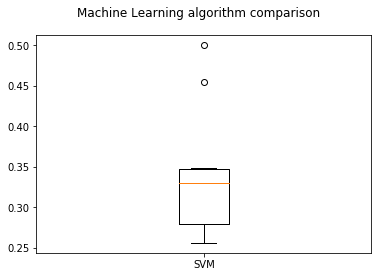

In [31]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [32]:
import matplotlib.pyplot as plt

# create the model - Random Forests
clf  = SVC(random_state=9)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

# path to test data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

['early_blight2.JPG', 'early_blight3.JPG', 'early_blight4.JPG', 'early_blight5.JPG', 'healthy.JPG', 'healthy1.JPG', 'healthy2.JPG', 'healthy3.JPG', 'healthy4.JPG', 'healthy6.JPG']
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(1,)


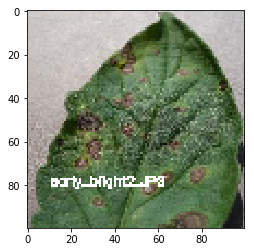

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(2,)


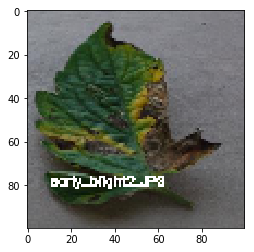

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(3,)


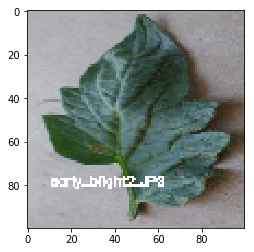

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(4,)


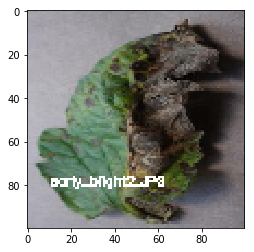

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(5,)


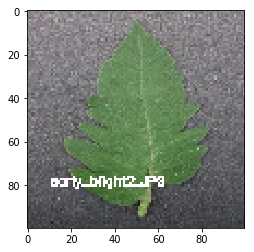

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(6,)


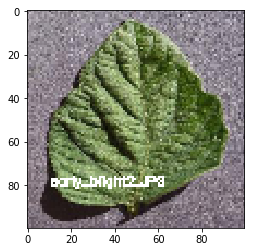

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(7,)


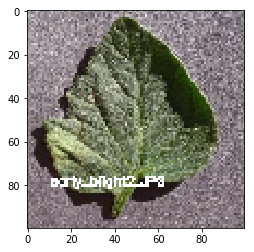

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(8,)


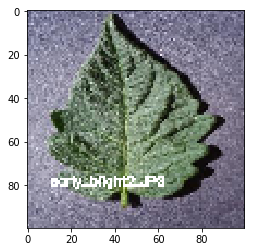

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(9,)


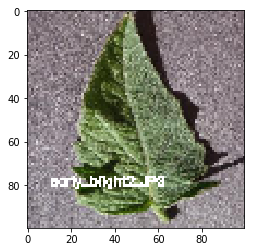

[STATUS] processed folder: healthy
PREDICTION RESULT 0
[STATUS] PREDICTION ARRAY(10,)


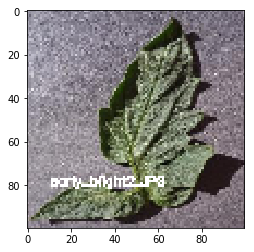

[STATUS] processed folder: healthy
[STATUS] TEST Labels (10,)
[STATUS] PREDICTION ARRAY(10,)


In [40]:
test_path="D:\\test_tomato"
labels = []
test_labels = os.listdir(test_path)
prediction_array=[]
print(test_labels)
i, j = 0, 0
k = 0
for file in glob.glob(test_path + "/*.jpg"):

#         ip_img = cv2.imread(file)
        ip_img = cv2.imread(file)
        image = cv2.resize(ip_img, (100,100))
        
        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)
###################################
        # Concatenate global features
        ###################################

        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        prediction = clf.predict(global_feature.reshape(1,-1))[0]
        print('PREDICTION RESULT',prediction)
        prediction_array.append(prediction)
        print("[STATUS] PREDICTION ARRAY{}".format(np.array(prediction_array).shape))
        cv2.putText(image, test_labels[prediction], (10,80), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,255,255), 1)
        # display the output image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        labels.append(current_label)
        i+=1
        k += 1

        print( "[STATUS] processed folder: {}".format(current_label))
#     print('GLOBAL FEATURE SHAPE',np.array(global_features).shape)
j+=1
 

# get the overall training label size
print ("[STATUS] TEST Labels {}".format(np.array(labels).shape))
print("[STATUS] PREDICTION ARRAY{}".format(np.array(prediction_array).shape))


In [42]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# # encode the target labels
# targetNames = np.unique(labels)
# print(labels)
le = LabelEncoder()
print('Label',le)
target = le.fit_transform(labels)
print(target.shape)
print ("[STATUS] training labels encoded...",np.array(labels).shape)

# normalize the feature vector in the range (0-1)
matrix=confusion_matrix(target,prediction_array)

Label LabelEncoder()
(10,)
[STATUS] training labels encoded... (10,)


In [43]:
print(matrix)

[[10]]


In [44]:
report=classification_report(target,prediction_array)

In [45]:
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        10



Text(0.5,1,'CONFUSION MATRIX')

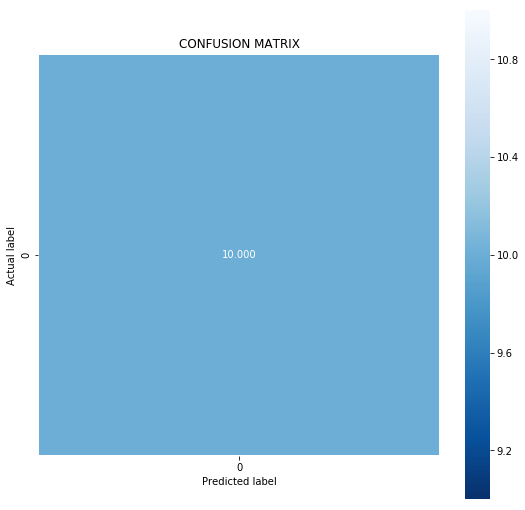

In [46]:
import seaborn as sns
import glob
import cv2
from matplotlib import pyplot
# score=clf.score(target,prediction_array)
plt.figure(figsize=(9,9))
sns.heatmap(matrix,annot=True,fmt=".3f",linewidth=0.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('CONFUSION MATRIX')